## Supervised LearningProject

### Data Description 

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.),
the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last 
personal loan campaign (Personal Loan). 
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:

Banking

## Importing  the necessary Libraries

In [254]:
import pandas as pd # for accessing the csv as a dataframe and do further operations 
import numpy as np # for numeric calculations
import matplotlib.pyplot as plt # for plotting
%matplotlib inline 
import seaborn as sns # for data visualization
sns.set(color_codes=True) # Supports assigning colors to plots

from sklearn import preprocessing  # for scaling the data
from sklearn.model_selection import train_test_split # for splitting data into train and test data

from sklearn import metrics #for score functions, performance metrics, pairwise metrics and distance computations.
from sklearn.metrics import  confusion_matrix # for Confusion Matrix
from sklearn.metrics import roc_auc_score # for ROC, AUC 
from sklearn.metrics import roc_curve # for ROC, AUC Curve
from sklearn.metrics import accuracy_score # Performance measure – Accuracy

from sklearn.linear_model import LogisticRegression # for Logistic Regression 
from sklearn.neighbors import KNeighborsClassifier # for KNN Classifier
from sklearn.naive_bayes import GaussianNB # for Gaussian Naive Bayes' Classification

## Importing the dataset

In [185]:
dataset = pd.read_csv('Bank_Personal_Loan_Modelling.csv')  # Reading the Personal Loan dataset 

In [186]:
dataset.head() # # Using head function to read the first 5 records of the dataset.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Understanding Attributes

ID - Customer ID. is just to maitain the record in serial order. It has no relationship with  Loan. It can be ignored and dropped as it will not any effect on our model.

ZIP Code - Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.

Family - Number of famlily member of the customer

Education - Education level of the customer. In our dataset, 1- Under Graduate, 2- Graduate and 3- Post Graduate.

Age - Age of the customer

Experience - Number of years of experience of the customer.

Income - Annual Income of the customer which is in dollars

CCAvg - Avg. spending on credit cards per month which in dollars.

Mortgage - Value of House Mortgage, if any.

CD Account - Does the customer have CD Account with bank or not?

Security Account - Does the customer have Security Account with bank or not?

Online - Does the customer have Online banking facility with bank or not?

Credit Card - Does the customer have a credit card issued by Thera Bank or not?

Personal Loan - This our target variable which we have to predict. This indicates if the customer has token loan or not?

'Age', 'Experience', 'Income','Family', 'CCAvg', and 'Mortgage' are Continuous Columns

'ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online' and 'CreditCard' are Categorical Columns


## Exploratory Data Analysis

#### Shape of the dataset

In [187]:
row_count, column_count = dataset.shape # Getting shape of the dataset; which is number of rows and number of columns
print('Total Number of rows :', row_count)
print('Total Number of columns :', column_count)

Total Number of rows : 5000
Total Number of columns : 14


The dataset has 5000 records and 14 feature attributes

In [188]:
dataset.size # Size is number of rows * number of columns

70000

In [189]:
dataset.ndim # Getting dimensions of the dataset

2

It is a 2D dataset

#### Data type of each attribute

In [190]:
dataset.info() # Getting datatype of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


1) All are numberic columns, 13 intergers and 1 float <br>
2) Non-Null count is same as number of records. So, seems like there is no Null.

#### Missing Values

In [191]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing values

#### Five Point Summary of the dataset

In [192]:
dataset.describe().transpose() # Getting Five-Point-Summary along with Count, mean and standard deviation

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Above information shows the range of all the attributes.

Bank has customers ranging in age from 23 to 67, However, the average age is 45, 75% customers are less than 55 years and only 25% customers range in the age of 55-67. This indicates that there is high potential range of customers who can be converted to Asset Customers, as people do not intend to take loans after 55-60 years of age.

Experience shows some negative values which is incorrect data and needs to be fixed.

Income has a wide range from $8 to $224. I assume that income is in Thousand. The data looks like skewed.

Mortgage looks like heavily skewed as 50% of the data is 0.

Maximum number of Family members is 4. However, 50% customers have only 2 family members and 75% have only 3. Number of family members is also a factor in taking up a loan, less family members means higher chances of converting to Asset Customer. It also depends on the requirement.

##### Replacing negative values of Experience with their mean.

In [193]:
dataset[dataset['Experience'] == -1]['Experience'].count() # counting the number of rows with experience = -1

33

In [194]:
dataset[dataset['Experience'] == -2]['Experience'].count()  # counting the number of rows with experience = -2

15

In [195]:
dataset[dataset['Experience'] == -3]['Experience'].count()  # counting the number of rows with experience = -3

4

So, in total there are 33 + 15 + 4 = 52 entries with negative value of Experience.

In [196]:
dataset['Experience'].replace(to_replace = -1, value = np.nan, inplace = True) # replacing negative values with nan
dataset['Experience'].replace(to_replace = -2, value = np.nan, inplace = True)
dataset['Experience'].replace(to_replace = -3, value = np.nan, inplace = True)

In [197]:
dataset['Experience'].isnull().sum() # finding the sum of rows with experience = nan

52

In [198]:
dataset['Experience'].fillna(dataset['Experience'].median(), inplace = True) # replacing nan values of experience with the mean

In [199]:
dataset.describe().transpose() # Checking if the negative values of experience have been replaced

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Now Experience column has no negative values

#### Dropping the not required columns

In [200]:
dataset.drop(['ID', 'ZIP Code'], axis=1, inplace=True) # Dropping ID and ZIP Code as they do not afftect the target variable.
                                                       # inplace=True makes sure that the changes happen in the dataset

In [201]:
dataset.head(3) # Checking if the columns have been dropped

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0


ZIP Code and ID have been dropped successfully.

### Data Visualization

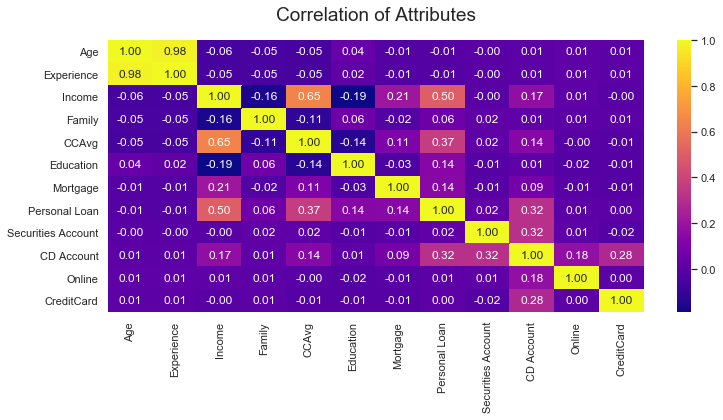

In [209]:
plt.figure(figsize = (12,5)) # defining the figure size
plt.title('Correlation of Attributes', y=1.05, size=19) # setting up the title of plot
sns.heatmap(dataset.corr(), cmap='plasma',annot=True, fmt='.2f'); # Get Correlation


'Age' and 'Experience' have high correlation between them

'Income' and 'CCAvg' are moderately correlated.

'Personal Loan' has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'. we need to study this.

'CD Account' is associated with 'Credit Card', 'Securities Account', 'Online', 'CCAvg' and 'Income'.

'Mortgage' has moderate correlation with 'Income'

'Income' is correlated to 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'. Which is quite natural.

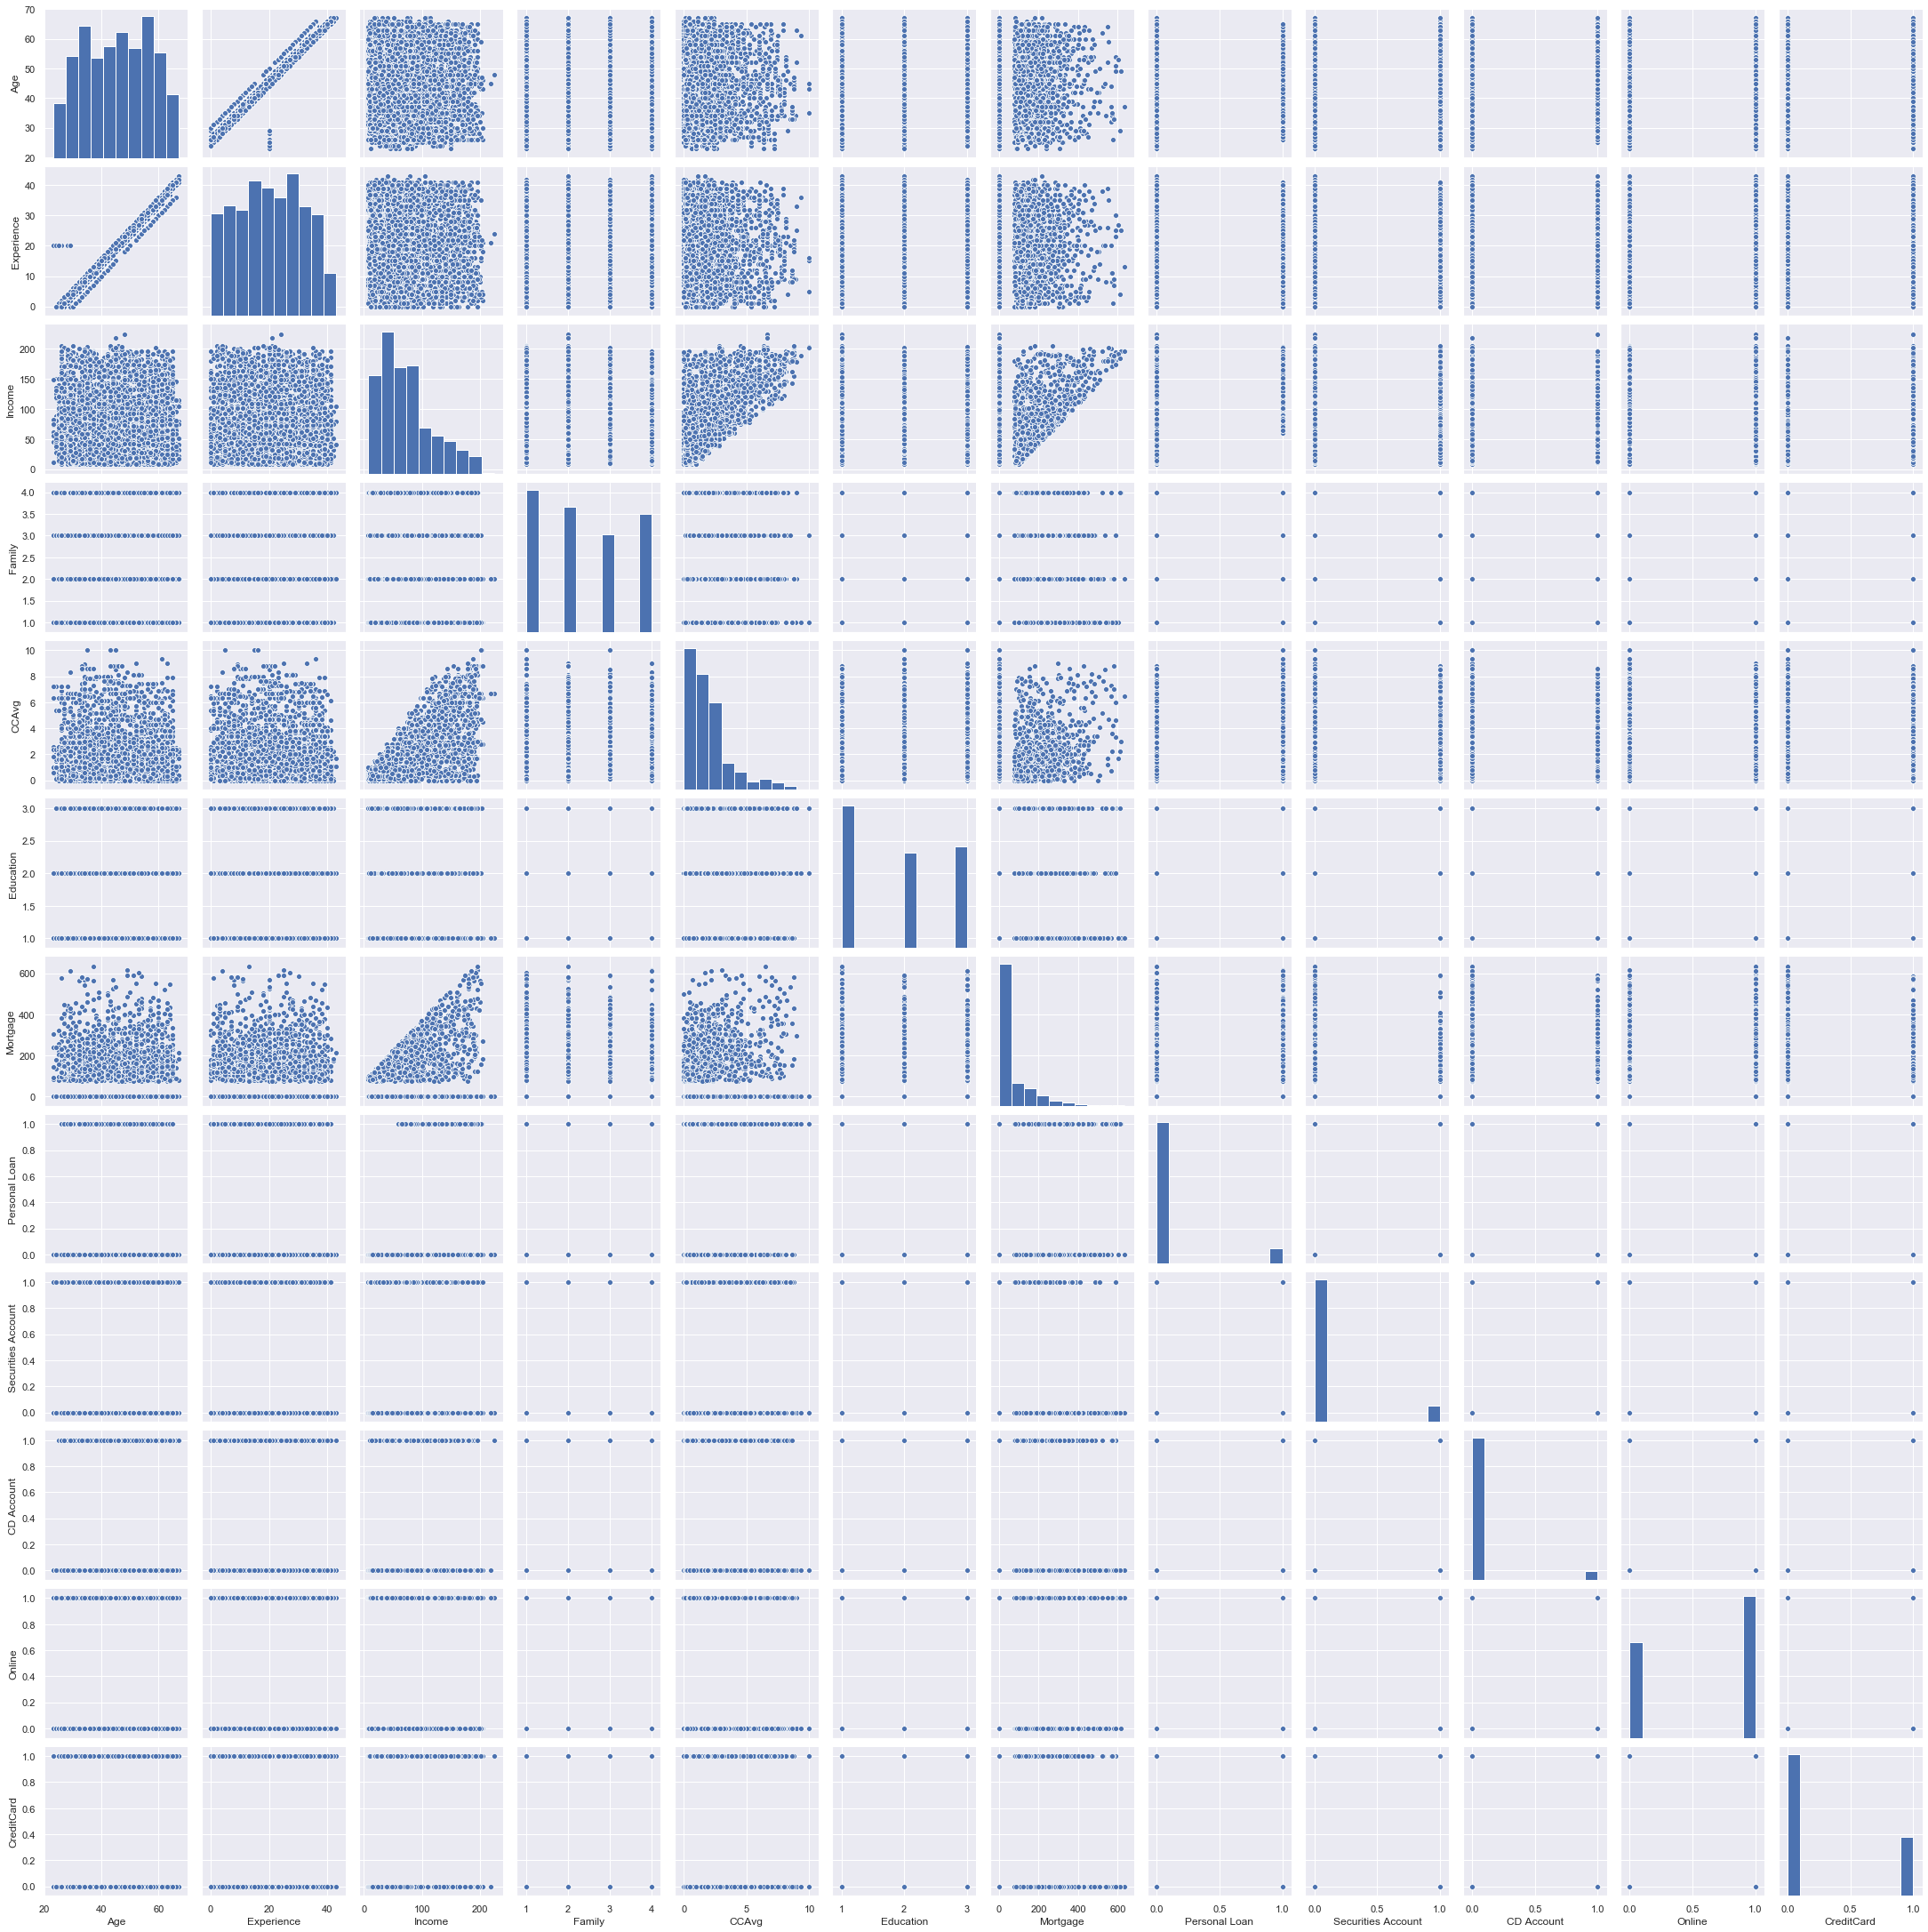

In [38]:
sns.pairplot(dataset);    # pairplot
plt.show();

Age' column is normally distributed. Here can see that the mean and median are almost same which we have also seen in the transpose matrics.

'Experience' is also mormally distributed. Here also mean is amost equal to median. 

'Experience' and 'Age' share a strong positive associasion.

'Income' is right skewed. Income and Credit Card seem corelated

'Family' and 'Education' have low association with the 'Personal Loan'.

The disribution of CCAvg is also a right skewed. 

'Mortgage' is also positively skewed. 

#### Data Distribution in Each Attribute & Target Column Distribution

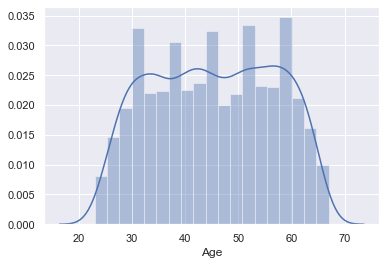

In [208]:
sns.distplot(dataset['Age'],kde=True); # Get histogram for Age

Age column is normally distributed

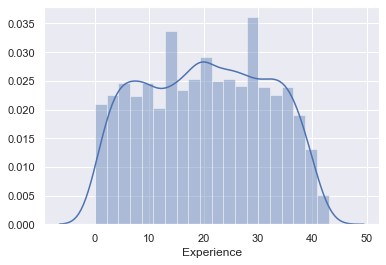

In [210]:
sns.distplot(dataset['Experience'],kde=True);  # Get histogram for Experience

Experience column is also normally distributed

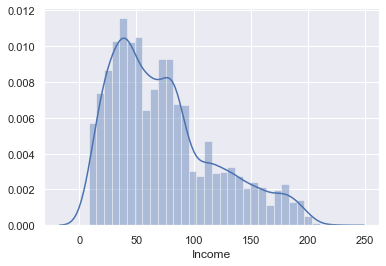

In [211]:
sns.distplot(dataset['Income'],kde=True);  # Get histogram for Experience

Income column is right skewed as the tail is towards right

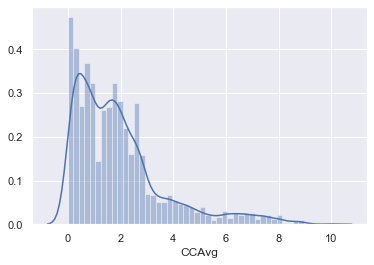

In [212]:
sns.distplot(dataset['CCAvg'],kde=True);  # Get histogram for CCAvg

CCAvg column is the monthly expenditure on Credit Card. Data here is right skewed as the tail is towards right.
Most of the customers spend $1K to $2.5K monthly. very few spend more than $8K.

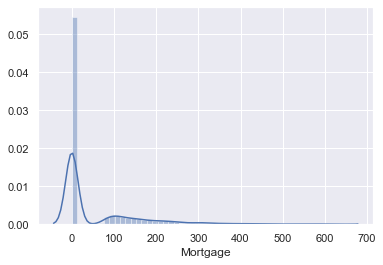

In [213]:
sns.distplot(dataset['Mortgage'],kde=True);  # Get histogram for Mortgage

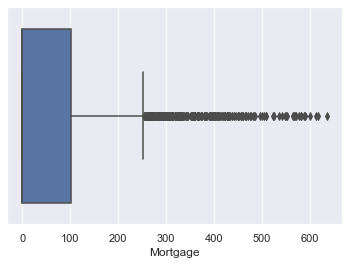

In [214]:
sns.boxplot(dataset['Mortgage']);  # Get Box-Plot for Mortgage

Mortgage data is right skewed. The plot shows that most of the customers have NO Mortgage. There are many outliers. 
Very few customers have Mortgage more than $600000.

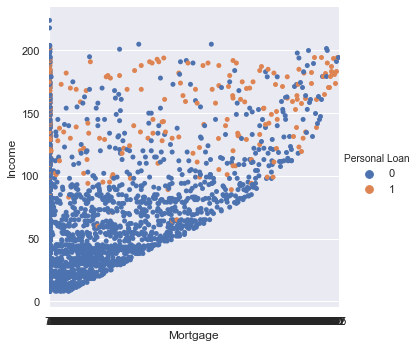

In [227]:
sns.catplot(x='Mortgage', y='Income', hue='Personal Loan', data = dataset, kind='swarm');

#### Analysing Categorical Variables

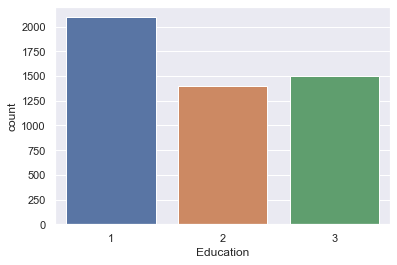

In [215]:
sns.countplot(dataset['Education']); # Get count plot for Education

Most of the people are Undergraduate

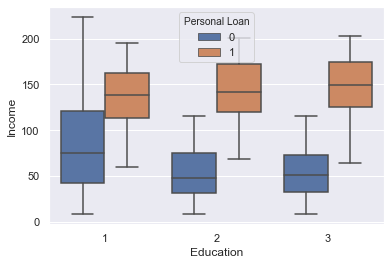

In [217]:
sns.boxplot(x= 'Education', y='Income', hue='Personal Loan' , data = dataset); # Boxplot to undertand relation among Education, Income and Personal LOan

Customers who took loan are in the same income range, irrespective of their education.

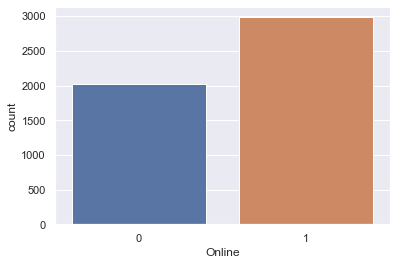

In [218]:
sns.countplot(dataset['Online']); # Countplot for Online

Number of customers with online account is approximately 1000 more than the number of customers who do not have online account.

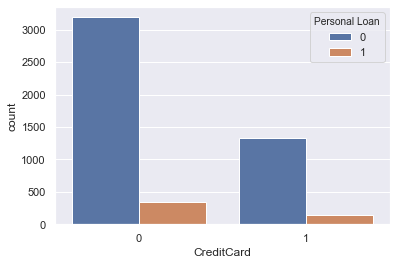

In [219]:
sns.countplot(x='CreditCard', data = dataset, hue='Personal Loan'); # Countplot to understand how Credit Card relates to Personal Loan

Most of the customers do not have Credit Card. Ones who do not have Credit Card do not have Presonal Loan as well.
Number of customers without Credit Card is more than double the number of customers who have Credit Card.

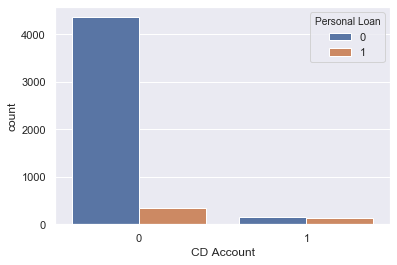

In [220]:
sns.countplot(x='CD Account', data = dataset, hue='Personal Loan'); # Countplot to understand how CD Account relates to Personal Loan

 Customers who do not have CD account, don't have loan as well. 
 Almost all customers who have CD account have loan.

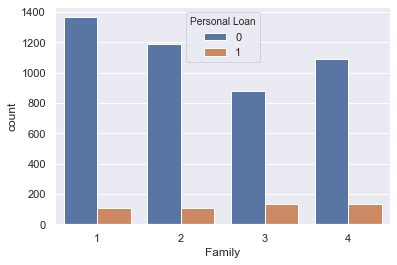

In [221]:
sns.countplot(x='Family', data=dataset, hue='Personal Loan'); # Countplot to understand how Family relates to Personal Loan

It seems like Family size does not have much impact on the fact if the customer will take Personal Loan.
People with familty size 3-4 have Loan more tahn the ones with 1-2.

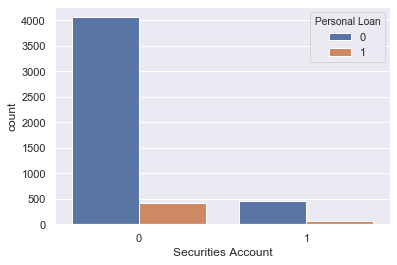

In [222]:
sns.countplot(x='Securities Account', data=dataset, hue='Personal Loan'); # Countplot to understand how Securities Account relates to Personal Loan

Majority of customers who do not have Securities Account, do not have Personal Loan as well.

In [78]:
# 0 = didnt take loan in the last campaign (90.4%)
# 1 = took loan in the last campaign (9.6%)
dataset["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

Out of 5000 customers, 4520 did not accept the loan and only 480 accepted the loan.

In [79]:
num_liability_cust = len(dataset[dataset["Personal Loan"] == 0]) # Number of customers who did not take loan
num_liability_cust

4520

In [80]:
num_asset_cust = len(dataset[dataset["Personal Loan"] == 1]) # Number of customers who took loan
num_asset_cust

480

In [81]:
total_cust = num_liability_cust + num_asset_cust
per_liability_cust = 100 * (num_liability_cust/total_cust)
per_asset_cust = 100 * (num_asset_cust/total_cust)
print("Percentage of Liability Customers ", per_liability_cust)
print("Percentage of Asset Customers ", per_asset_cust)

Percentage of Liability Customers  90.4
Percentage of Asset Customers  9.6


From the above pairplot we see that there are a few features that greatly impact our target column. Let's analyse them

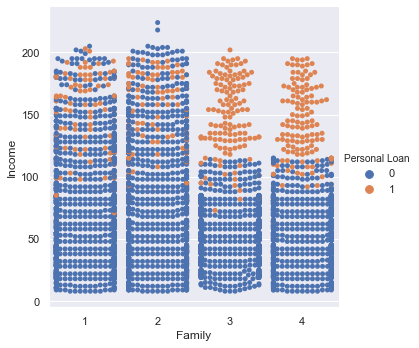

In [82]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = dataset, kind='swarm'); # Swarmplot to study Family-Income relationship with respect to Personal Loan

This shows that the Customers with family size 3 or more and income between 100K to 200K are more likely to take loan.

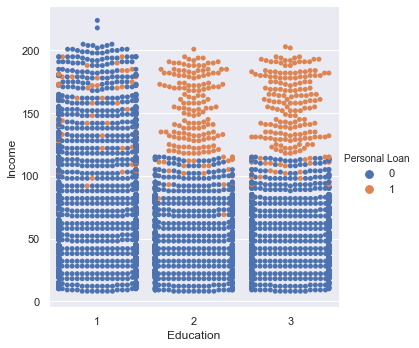

In [47]:
sns.catplot(x='Education', y='Income', hue='Personal Loan', data = dataset, kind='swarm');# Swarmplot to study Education-Income relationship with respect to Personal Loan

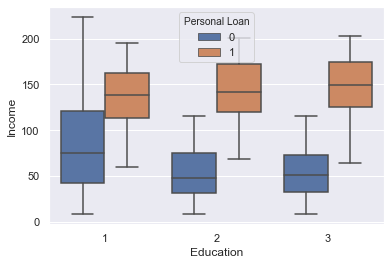

In [49]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = dataset); # Boxplot to study Family-Income relationship with respect to Personal Loan

This shows  that Post-Graduate and Advanced Level educated people have higher chances of taking loan. Undergraduate customers also have opted for loan. However, the income range of Asset Customers is almost the same irrespective of the education.

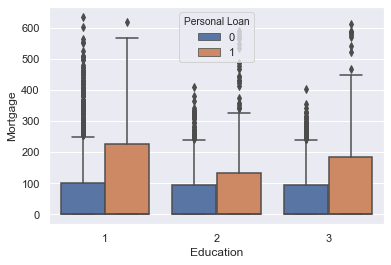

In [51]:
sns.boxplot(x='Education', y='Mortgage', hue='Personal Loan', data = dataset); # Boxplot to study Education-Mortgage relationship with respect to Personal Loan

There are many outliers in mortgage, this is the same that we realise earlier.
Undergraduate Customers without loan have higher mortagage than the onea who have taken loan
in Post-Graduate and Advanced education level customers category, the ones who have taken loan have higher mortgage than the ones who have not taken any loan.

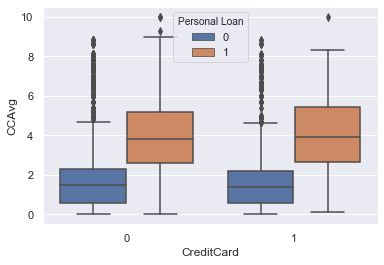

In [52]:
sns.boxplot(x='CreditCard', y='CCAvg', hue='Personal Loan', data = dataset); # Boxplot to study CCAvg-CreditCard relationship with respect to Personal Loan

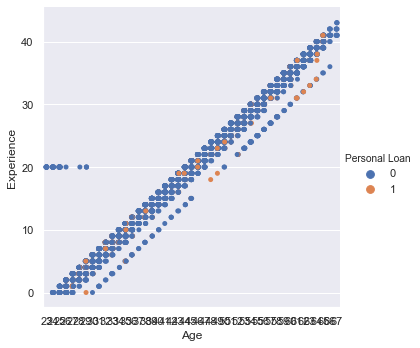

In [53]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = dataset); # catplot to study Age-Experience relationship with respect to Personal Loan

Age and Experience have strong association. With increased age, experience also increases.

## Model Building

In [83]:
X = dataset.drop(columns = 'Personal Loan', axis = 1) # Predictor feature column
Y = dataset['Personal Loan'] # Predicted class (1 = Customer accepted the Personal loan T, 0=Customer did not accept the Personal loan)

In [84]:
standardized_X = preprocessing.scale(X)
standardized_X

array([[-1.77441684, -1.71771726, -0.53822878, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.11798886, -0.8641094 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.47348406, -1.36379301, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033,  1.65948715, -1.08136314, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965,  1.74836095, -0.53822878, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285, -1.45109586,  0.20043396, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [85]:
normalized_X = preprocessing.normalize(X) #normalize the data attributes

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 1 ) 
# The data is divided as 30% Test and 70% Train. 1 is just any random seed number

In [91]:
x_train.head() # top 5 rows of Training data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22.0,35,2,1.3,1,0,0,0,1,0
4768,38,14.0,39,1,2.0,2,0,0,0,1,0
65,59,35.0,131,1,3.8,1,0,0,0,1,1
177,29,3.0,65,4,1.8,2,244,0,0,0,0
4489,39,13.0,21,3,0.2,2,0,0,0,1,0


In [93]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(dataset.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(dataset.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check Loan-Taken/Loan-Not-Taken ratio in split data

In [94]:
print("Original Assest Customer Count     : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['Personal Loan'] == 1]), (len(dataset.loc[dataset['Personal Loan'] == 1])/len(dataset.index)) * 100))
print("Original Liability Customer Count  : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['Personal Loan'] == 0]), (len(dataset.loc[dataset['Personal Loan'] == 0])/len(dataset.index)) * 100))
print("")
print("Training Assest Customer Count     : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Liability Customer Count  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Assest Customer Count         : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Liability Customer Count      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Assest Customer Count     : 480 (9.60%)
Original Liability Customer Count  : 4520 (90.40%)

Training Assest Customer Count     : 331 (9.46%)
Training Liability Customer Count  : 3169 (90.54%)

Test Assest Customer Count         : 149 (9.93%)
Test Liability Customer Count      : 1351 (90.07%)



### Logistic Regression

In [122]:
logreg = LogisticRegression(solver='liblinear') # solver is just to avoid the warning message

logreg.fit(x_train,y_train) #  Fit the model on training data

y_predict = logreg.predict(x_test) # Test the model on Testing data

logreg_train_accuracy = round(logreg.score(x_train,y_train), 4)   # Find Accuracy Score for Training data
logreg_test_accuracy = round(logreg.score(x_test, y_test), 4)   # Find Accuracy Score for Testing data
print("Accuracy on Training data ", logreg_train_accuracy)
print("Accuracy on Testing data ", logreg_test_accuracy)

Accuracy on Training data  0.9497
Accuracy on Testing data  0.942


#### Confusion Matrix

In [253]:
logreg_confusion_matrix = metrics.confusion_matrix(y_test, y_predict) # Get Confusion Matrix

print("Confusion Matrix \n",logreg_confusion_matrix,"\n" )

logreg_tp = logreg_confusion_matrix[1][1] # True Positive
logreg_tn = logreg_confusion_matrix[0][0] # True Negative
logreg_fp = logreg_confusion_matrix[0][1] # False Positive
logreg_fn = logreg_confusion_matrix[1][0] # False Negative

logreg_recall      = round(logreg_tp/(logreg_tp+logreg_fn), 4) # calculate recall
logreg_precision   = round(logreg_tp/(logreg_tp+logreg_fp), 4) # calculate precision
logreg_specificity = round(logreg_tn/(logreg_tn+logreg_fp),4)  # calculate Specificity
logreg_f1_score    = round(2*logreg_precision*logreg_recall/(logreg_precision + logreg_recall), 4) # calculate F1_Score

print("Logistic Regression Result")
print("Accuracy: ", logreg_test_accuracy)
print("Recall: ", logreg_recall)
print("Precision: ", logreg_precision)
print("Specificity: ", logreg_specificity)
print("F1 Score: ", logreg_f1_score)


Confusion Matrix 
 [[1335   16]
 [  71   78]] 

Logistic Regression Result
Accuracy:  0.942
Recall:  0.5235
Precision:  0.8298
Specificity:  0.9882
F1 Score:  0.642


### ROC Curve

Roc is a curve which allows us to compare models. It is plot between TPR(true positive rates) and FPR(false positive rate). The area under the ROC curve (AUC) is a measure of the how good a model is.

The ROC curve is a useful tool for a few reasons:

The curves of different models can be compared directly in general or for different thresholds.

The area under the curve (AUC) can be used as a summary of the model skill.

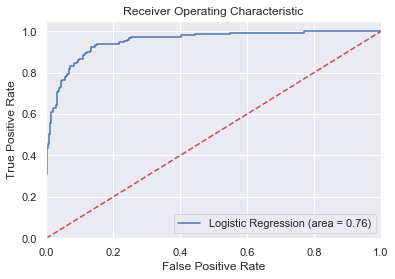

In [242]:
logreg_roc_auc = roc_auc_score(y_test, logreg.predict(x_test)) # Get ROC Cure
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### K Nearest Neighbour the KNN Model

### Choosing the K-Value

Choosing the right k is not easy and is subjective. Usually choose as an odd number is choosen.

A small k captures too much training noise and hence does not do well in test data. It overfits the Training data.

A very large k does so much smoothening that it does not manage to capture information in the training data sufficiently - and hence does not do well in test data.

If the number of classes is 2, many suggest a rule of thumb approach(set k=sqrt(n)), that might not be the best but does well mostly.

To find k, we find accuracy scores for a range of K, and select the best one.

In [163]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

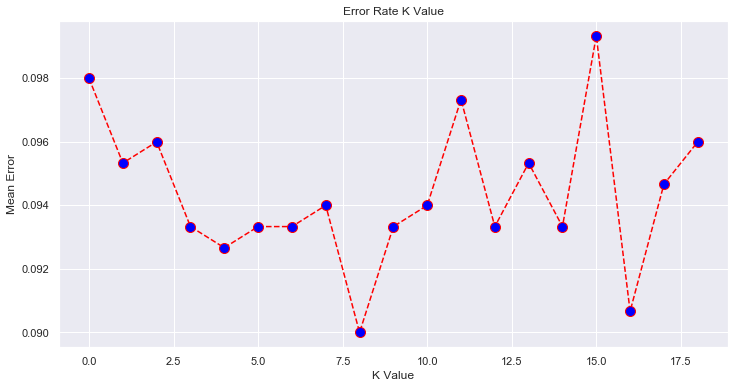

In [164]:
plt.figure(figsize=(12, 6))
plt.plot(error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the above plot, the Best value of K comes to be 8.

Now building KNN model with K=8

In [174]:
knn = KNeighborsClassifier(n_neighbors=8) # providing the best value of K

knn.fit(x_train,y_train) #  Fit the model on training data

knn_y_predict = knn.predict(x_test) # Test the model on Testing data

knn_train_accuracy = round(knn.score(x_train,y_train), 4)   # Find Accuracy Score for Training data
knn_test_accuracy = round(knn.score(x_test, y_test), 4)   # Find Accuracy Score for Testing data
print("Accuracy on Training data ", knn_train_accuracy)
print("Accuracy on Testing data ", knn_test_accuracy)

Accuracy on Training data  0.9237
Accuracy on Testing data  0.906


#### Confusion Matrix

In [252]:
knn_confusion_matrix = metrics.confusion_matrix(y_test, knn_y_predict) # Confusion Matrix 

print("Confusion Matrix \n",knn_confusion_matrix,"\n" )

knn_tp = knn_confusion_matrix[1][1] # True Positive
knn_tn = knn_confusion_matrix[0][0] # True Negative
knn_fp = knn_confusion_matrix[0][1] # False Positive
knn_fn = knn_confusion_matrix[1][0] # False Negative

knn_recall      = round(knn_tp/(knn_tp+knn_fn), 4) # calculate recall  
knn_precision   = round(knn_tp/(knn_tp+knn_fp), 4) # calculate precision
knn_specificity = round(knn_tn/(knn_tn+knn_fp),4)  # calculate specificity
knn_f1_score    = round(2*knn_precision*knn_recall/(knn_precision + knn_recall), 4) # calculate F1_Score

print("KNN Result")
print("Accuracy: ", knn_test_accuracy)
print("Recall: ", knn_recall)
print("Precision: ", knn_precision)
print("Specificity: ", knn_specificity)
print("F1 Score: ", knn_f1_score)

Confusion Matrix 
 [[1324   27]
 [ 114   35]] 

KNN Result
Accuracy:  0.906
Recall:  0.2349
Precision:  0.5645
Specificity:  0.98
F1 Score:  0.3318


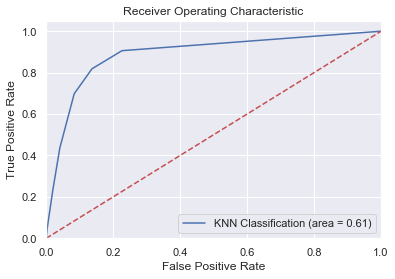

In [243]:
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test)) # Get ROC Cure
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classification (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

### Gaussian Naive Bayes Classification

In [168]:
gnb = GaussianNB() # Create Gaussian Classifier

gnb.fit(x_train,y_train) #  Fit the model on training data

gnb_y_predict = gnb.predict(x_test) # Test the model on Testing data

gnb_train_accuracy = round(gnb.score(x_train,y_train), 4)   # Find Accuracy Score for Training data
gnb_test_accuracy = round(gnb.score(x_test, y_test), 4)   # Find Accuracy Score for Testing data
print("Accuracy on Training data ", gnb_train_accuracy)
print("Accuracy on Testing data ", gnb_test_accuracy)

Accuracy on Training data  0.89
Accuracy on Testing data  0.8753


#### Confusion Matrix

In [251]:
gnb_confusion_matrix = metrics.confusion_matrix(y_test, y_predict) # Get Confusion Matrix

print("Confusion Matrix \n",gnb_confusion_matrix,"\n" )

gnb_tp = gnb_confusion_matrix[1][1] # True Positive
gnb_tn = gnb_confusion_matrix[0][0] # True Negative
gnb_fp = gnb_confusion_matrix[0][1] # False Positive
gnb_fn = gnb_confusion_matrix[1][0] # False Negative

gnb_recall      = round(gnb_tp/(gnb_tp+gnb_fn), 4)   # calculate recall
gnb_precision   = round(gnb_tp/(gnb_tp+gnb_fp), 4)   # calculate precision
gnb_specificity = round(gnb_tn/(gnb_tn+gnb_fp),4)    # calculate specificity
gnb_f1_score    = round(2*gnb_precision*gnb_recall/(gnb_precision + gnb_recall), 4) # calculate F1-Score

print("Gaussian Naive Bayes Result")
print("Accuracy: ", gnb_test_accuracy)
print("Recall: ", gnb_recall)
print("Precision: ", gnb_precision)
print("Specificity: ", gnb_specificity)
print("F1 Score: ", gnb_f1_score)

Confusion Matrix 
 [[1335   16]
 [  71   78]] 

Gaussian Naive Bayes Result
Accuracy:  0.8753
Recall:  0.5235
Precision:  0.8298
Specificity:  0.9882
F1 Score:  0.642


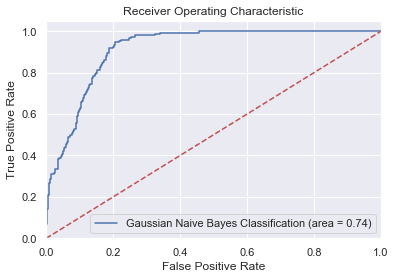

In [255]:
gnb_roc_auc = roc_auc_score(y_test, gnb.predict(x_test)) # Get ROC Cure
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes Classification (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

## Final Result

In [250]:
final_result = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'"],
                      'Train Accuracy': [ logreg_train_accuracy ,  knn_train_accuracy ,  gnb_train_accuracy],
                      'Test Accuracy': [ logreg_test_accuracy ,  knn_test_accuracy ,  gnb_test_accuracy],
                      'Area Under the Curve' : [logreg_roc_auc, knn_roc_auc, gnb_roc_auc],
                      'Recall' : [logreg_recall ,  knn_recall ,  gnb_recall],
                      'Precision': [logreg_precision ,  knn_precision ,  gnb_precision],
                      'Specificity': [logreg_specificity ,  knn_specificity ,  gnb_specificity],
                      'F1 Score' : [logreg_f1_score, knn_f1_score, gnb_f1_score]})
final_result

,Model,Train Accuracy,Test Accuracy,Area Under the Curve,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.9497,0.9420,0.755823,0.5235,0.8298,0.9882,0.6420
1,KNN,0.9237,0.9060,0.607457,0.2349,0.5645,0.9800,0.3318
2,Naive Bayes',0.8900,0.8753,0.739713,0.5235,0.8298,0.9882,0.6420


The logistic Regression model comes to be the best as the accuracy of the train and test set is almost similar and also Area under teh Curve is Best in this case. The precsion and recall accuracy is good. The confusion matrix is also better in comparision to other models.

The KNN is distance based which not perfect for this situation. Though the accuracy is good but Area Under the Curve is less.

The Naive Bayes accuracy is less in comaprision to other models meaning the probability of determing the target correctly is less.

### Logistic Regression comes out to be the Best Model for this dataset